## INTRO MACHINE LEARNING

---

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.
Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

Los objetivos de hoy son:

Buscar un conjunto de datos a analizar:
Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

In [409]:
# ============================================
import pandas as pd
import numpy as np
import sidetable

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings

# Visualizacion de todas las columnas

pd.options.display.max_columns = None

# Reemplazo de nulos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [410]:
df= pd.read_csv('../files/life_data.csv', index_col=0)

---

### 1) Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [411]:
df.shape

(2938, 21)

In [412]:
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2938 entries, Afghanistan to Zimbabwe
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expen

In [414]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [415]:
df.describe(include='object')

,Status
count,2938
unique,2
top,Developing
freq,2426


In [416]:
df.duplicated().sum()

0

In [417]:
numericas = df.select_dtypes(include= np.number)

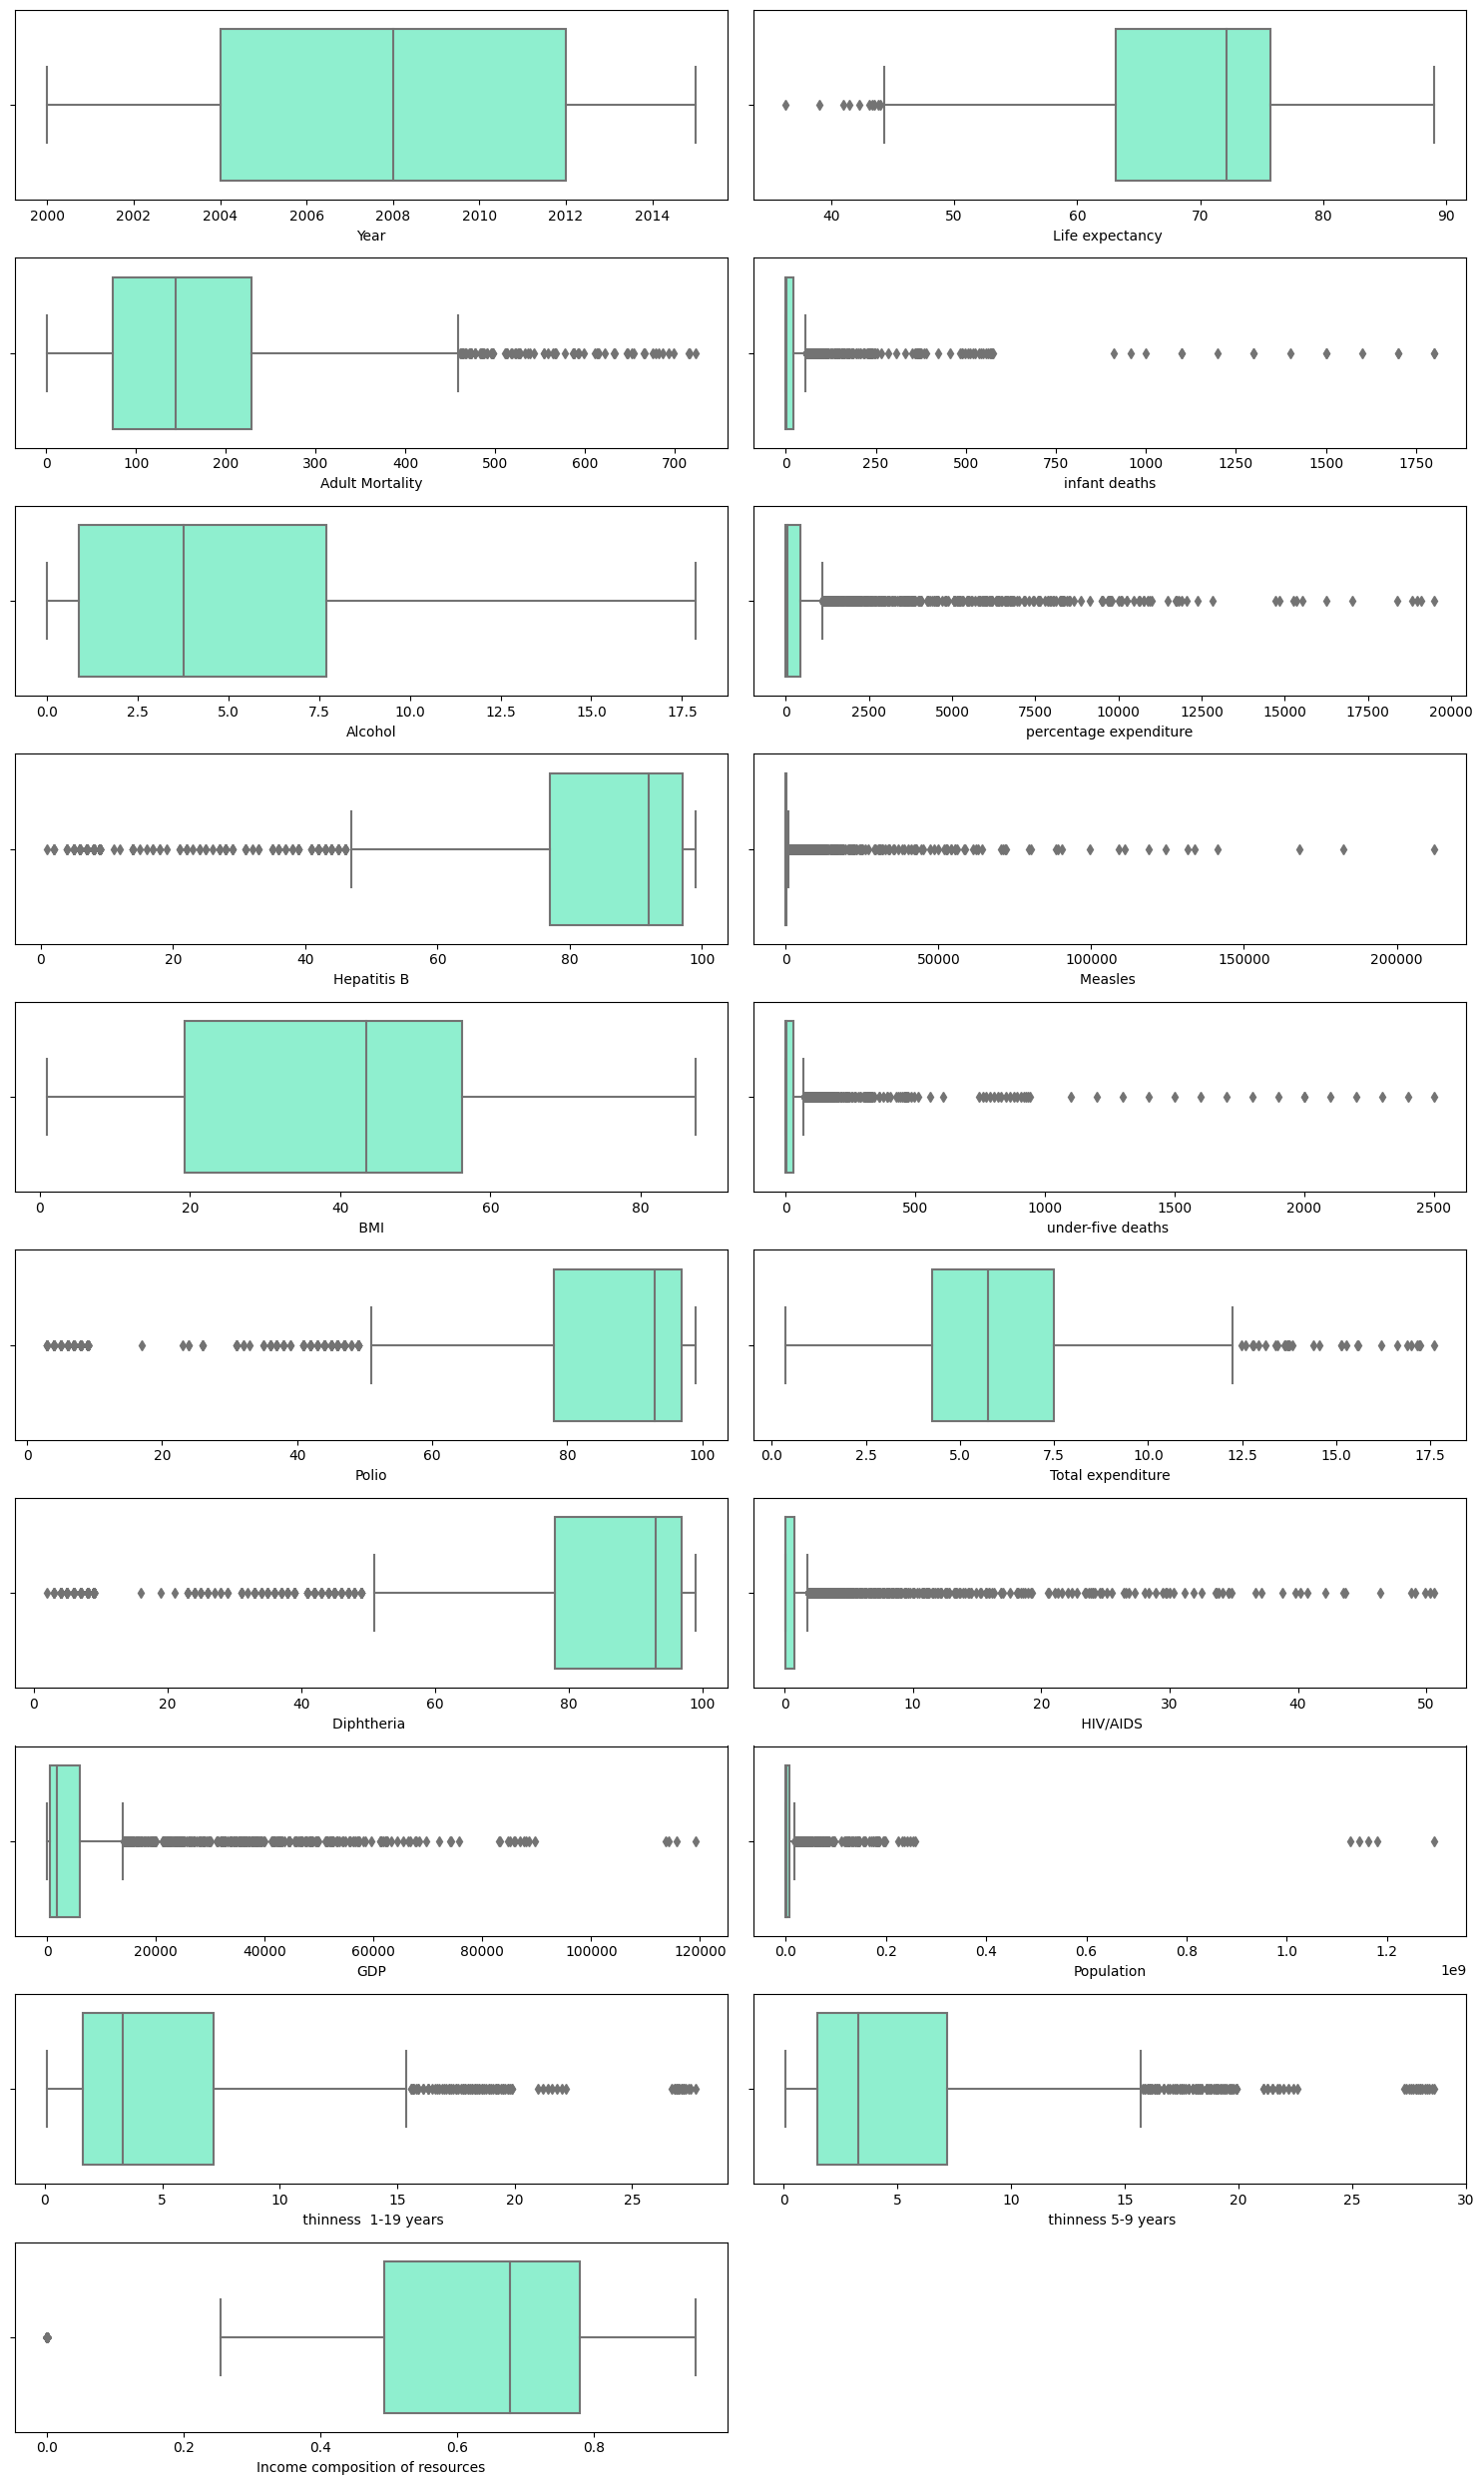

In [418]:
fig, axes = plt.subplots(10, 2, figsize=(15,25))
axes = axes.flat
for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [419]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

---

### Homogenizar las columnas

In [420]:
df.reset_index(inplace=True)

In [421]:
cambio_columnas = {col :  col.lower().strip().replace(" ","_") for col in df.columns}

In [422]:
df.rename(columns = cambio_columnas, inplace=True)

In [423]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

---

### Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
Esto se hace para que comprendais mejor los datos con los que estais trabajando.

In [424]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

Columnas:

- 'Year'= Año de la observación

- 'Status'= Developped o Developping

- 'Life expectancy '=  Expectativa de vida en años

- 'Adult Mortality'= Mortalidad de Adultos

- 'infant deaths'= Tasas de mortalidad de adultos de ambos sexos (probabilidad de morir entre los 15 y los 60 años por 1000

- 'Alcohol'= Consumo en litros de alcohol puro per capita para mayores de 15 años al año.

- 'percentage expenditure'= Gasto sanitario en porcentaje del Producto Interior Bruto per cápita(%)

- 'Hepatitis B'= Cobertura de vacunación contra la hepatitis B (HepB) entre niños de 1 año (%)

- 'Measles '= Sarampión - número de casos notificados por 1000 habitantes

- ' BMI '= Índice de masa corporal medio de toda la población

- 'under-five deaths '= Número de muertes de menores de 5 años por 1000 habitantes

- 'Polio'= Polio (Pol3) immunization coverage among 1-year-olds (%)

- 'Total expenditure'= Gasto de las administraciones públicas en sanidad como porcentaje del total de las administraciones públicas

- 'Diphtheria '= Cobertura de vacunación contra la difteria, el tétanos y la tos ferina (DTP3) en niños de 1 año (%)

- ' HIV/AIDS' = Muertes por cada 1 000 nacidos vivos VIH/SIDA (0-4 años)

- 'GDP'= Producto Interior Bruto per cápita (en USD)

- 'Population'= Población del país

- ' thinness  1-19 years'= Prevalencia de la delgadez entre niños y adolescentes de 10 a 19 años (% )

- ' thinness 5-9 years'= Prevalencia de la delgadez entre los niños de 5 a 9 años(%)

- 'Income composition of resources'= Índice de Desarrollo Humano en función de la composición de los recursos (índice de 0 a 1)

- 'Schooling'= Número de años de escolarización(años)

In [425]:
df.corr()

/var/folders/db/hp0l5_js4yv8br5y2tc3frpm0000gn/T/ipykernel_17613/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
life_expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
adult_mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant_deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage_expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
hepatitis_b,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
bmi,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five_deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


---

### VARIABLE RESPUESTA:


Life_Expectancy

In [426]:
df.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [427]:
df["status"].value_counts()

Developing    2426
Developed      512
Name: status, dtype: int64

### Limitación de investigación y creación columna continentes

In [428]:
# !pip install a-world-of-countries #Instalacion de libreria

In [429]:
df.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [430]:
import awoc

In [431]:
# Initialize the AWOC class.
my_world = awoc.AWOC()

In [432]:
countries = my_world.get_countries()

In [433]:
#nulos= df[~ pd.notnull(df["continente"])] #Generamos un data Frame con los nulos de la columna 'continente'

In [434]:
dic_replace= {'Bolivia (Plurinational State of)': 'Bolivia', 'Brunei Darussalam':"Brunei",
       "Côte d'Ivoire": "Ivory Coast", 'Cabo Verde': 'Cape Verde', 'Congo':'Republic of the Congo', 'Czechia':'Czech Republic',
       "Democratic People's Republic of Korea": 'North Korea',
       'Iran (Islamic Republic of)':'Iran', "Lao People's Democratic Republic":'Laos',
       'Micronesia (Federated States of)': 'Micronesia', 'Republic of Korea': 'South Korea' ,
       'Republic of Moldova': 'Moldova', 'Russian Federation':  'Russia',
       'Syrian Arab Republic': 'Syria',
       'The former Yugoslav republic of Macedonia':'Macedonia', 'Timor-Leste':'Indonesia',
       'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
       'United Republic of Tanzania':'Tanzania', 'United States of America':'United States',
       'Venezuela (Bolivarian Republic of)':'Venezuela', 'Viet Nam':'Vietnam'}

In [435]:
df.country.replace(dic_replace, inplace=True)

In [436]:
nombres= []
continentes = []

for i in range(len(countries)):
    #print(countries[i]['Country Name'])
    # print(countries[i]['Continent Name'])
    nombres.append(countries[i]['Country Name'])
    continentes.append(countries[i]['Continent Name'])

mapa = dict(zip(nombres, continentes))


In [437]:
df["continente"] = df["country"].map(mapa,na_action="ignore")

In [438]:
df.continente.isnull().sum()#Verificamos que la columna nueva de continentes no tiene ningun nulo

0

In [439]:
df.continente.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

## Tratamiento de nulos

In [440]:
df.stb.missing()

,missing,total,percent
population,652,2938,22.191967
hepatitis_b,553,2938,18.822328
gdp,448,2938,15.248468
total_expenditure,226,2938,7.692308
alcohol,194,2938,6.603131
income_composition_of_resources,167,2938,5.684139
schooling,163,2938,5.547992
thinness_5-9_years,34,2938,1.157250
thinness__1-19_years,34,2938,1.157250
bmi,34,2938,1.157250


### Nulos columna respuesta

In [441]:
df.life_expectancy.isnull().sum()

10

### Visto que tenemos nulos en varias de nuestras columnas hemos decidido usar el metodo IntertiveImputer para remplazar los nulos.

In [442]:
numericas = df.select_dtypes(include = np.number)

In [443]:
imputer = IterativeImputer(n_nearest_features=None, imputation_order='ascending')

In [444]:
imputer.fit(numericas)


IterativeImputer()

In [445]:
imputer.transform(numericas)

array([[2.015e+03, 6.500e+01, 2.630e+02, ..., 1.730e+01, 4.790e-01,
        1.010e+01],
       [2.014e+03, 5.990e+01, 2.710e+02, ..., 1.750e+01, 4.760e-01,
        1.000e+01],
       [2.013e+03, 5.990e+01, 2.680e+02, ..., 1.770e+01, 4.700e-01,
        9.900e+00],
       ...,
       [2.002e+03, 4.480e+01, 7.300e+01, ..., 1.300e+00, 4.270e-01,
        1.000e+01],
       [2.001e+03, 4.530e+01, 6.860e+02, ..., 1.700e+00, 4.270e-01,
        9.800e+00],
       [2.000e+03, 4.600e+01, 6.650e+02, ..., 1.120e+01, 4.340e-01,
        9.800e+00]])

In [446]:
numericas_sinnull = pd.DataFrame(imputer.transform(numericas), columns = numericas.columns)

In [447]:
numericas_sinnull.isnull().sum()

year                               0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [448]:
columnas = numericas_sinnull.columns


In [449]:
df.drop(columnas, axis = 1, inplace = True)

In [450]:
df[columnas] = numericas_sinnull[columnas]

In [451]:
df.iloc[624:770,:]

,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
624,Cook Islands,Developing,Oceania,2013.0,73.948631,110.935673,0.0,0.010000,0.000000,98.000000,0.0,82.8,0.0,98.0,3.580000,98.0,0.1,6862.191327,9.173272e+06,0.1,0.1,0.738711,13.142338
625,Costa Rica,Developing,North America,2015.0,79.600000,95.000000,1.0,5.552663,0.000000,92.000000,0.0,6.5,1.0,92.0,6.495635,92.0,0.1,1146.362730,4.878520e+05,1.7,1.7,0.775000,14.200000
626,Costa Rica,Developing,North America,2014.0,79.500000,96.000000,1.0,3.450000,384.512914,91.000000,1.0,59.5,1.0,91.0,9.310000,91.0,0.1,1647.441790,4.757575e+06,1.7,1.7,0.768000,13.900000
627,Costa Rica,Developing,North America,2013.0,79.400000,96.000000,1.0,3.420000,386.137912,94.000000,0.0,58.5,1.0,95.0,9.470000,95.0,0.1,1569.666310,4.764100e+04,1.7,1.7,0.762000,13.700000
628,Costa Rica,Developing,North America,2012.0,79.200000,97.000000,1.0,3.340000,2568.237059,91.000000,0.0,57.5,1.0,9.0,9.560000,91.0,0.1,9985.369590,4.654122e+06,1.8,1.7,0.758000,13.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,Djibouti,Developing,Africa,2003.0,58.000000,325.000000,2.0,1.020000,94.133029,66.025493,37.0,29.4,2.0,68.0,6.220000,68.0,4.2,819.974118,7.586150e+05,6.1,5.9,0.378000,3.500000
766,Djibouti,Developing,Africa,2002.0,57.900000,322.000000,2.0,1.030000,13.466620,61.075455,50.0,29.0,2.0,62.0,5.450000,62.0,4.3,792.154120,7.462210e+05,6.2,6.0,0.372000,3.300000
767,Djibouti,Developing,Africa,2001.0,57.700000,323.000000,2.0,0.950000,92.497895,52.613578,79.0,28.6,2.0,49.0,5.370000,53.0,4.3,781.232220,7.327110e+05,6.3,6.1,0.363000,2.900000
768,Djibouti,Developing,Africa,2000.0,57.400000,325.000000,2.0,1.340000,91.950759,47.640863,183.0,28.2,2.0,46.0,5.750000,46.0,4.1,768.176767,7.175840e+05,6.4,6.1,0.361000,2.900000


#### Vemos que existen muchos outliers por lo que dividiremos el dataframe en dos para analizarlo

In [452]:
df_desarrollados = df[df["status"] == "Developed"]


In [453]:
df_endesarrollo= df[df["status"] == "Developing"]

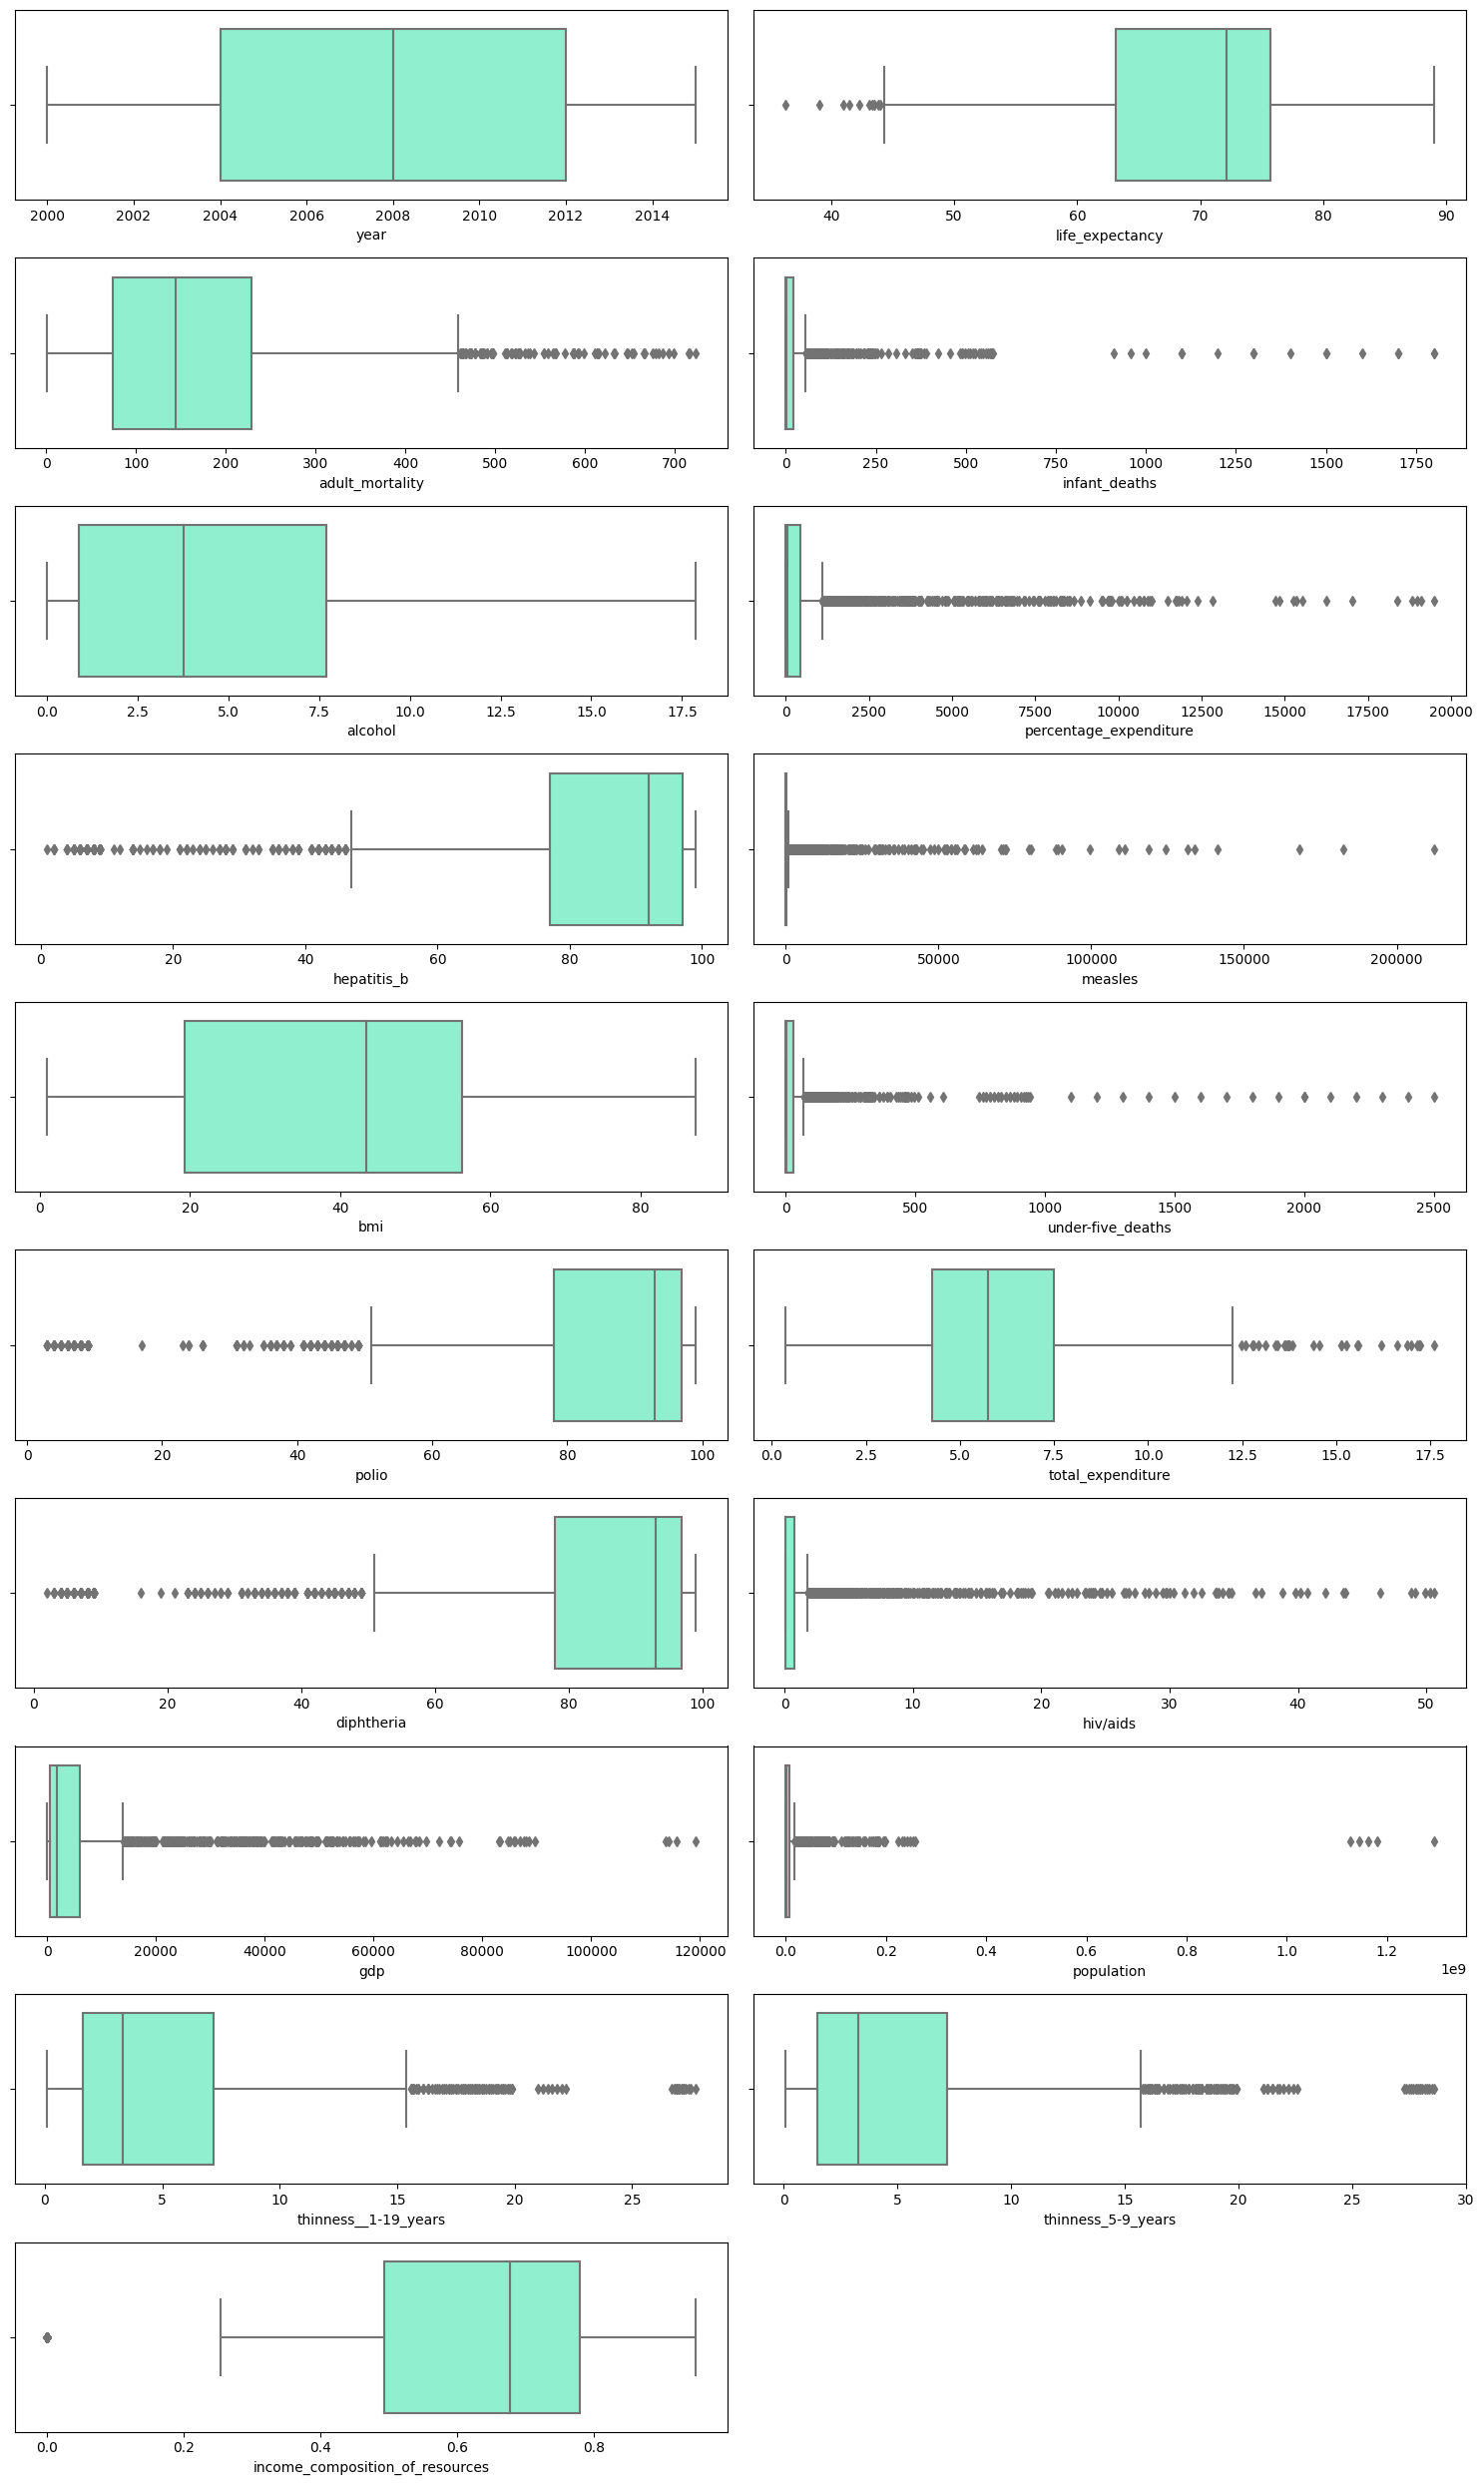

In [454]:
fig, axes = plt.subplots(10, 2, figsize=(15,25))
axes = axes.flat
for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df_desarrollados, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

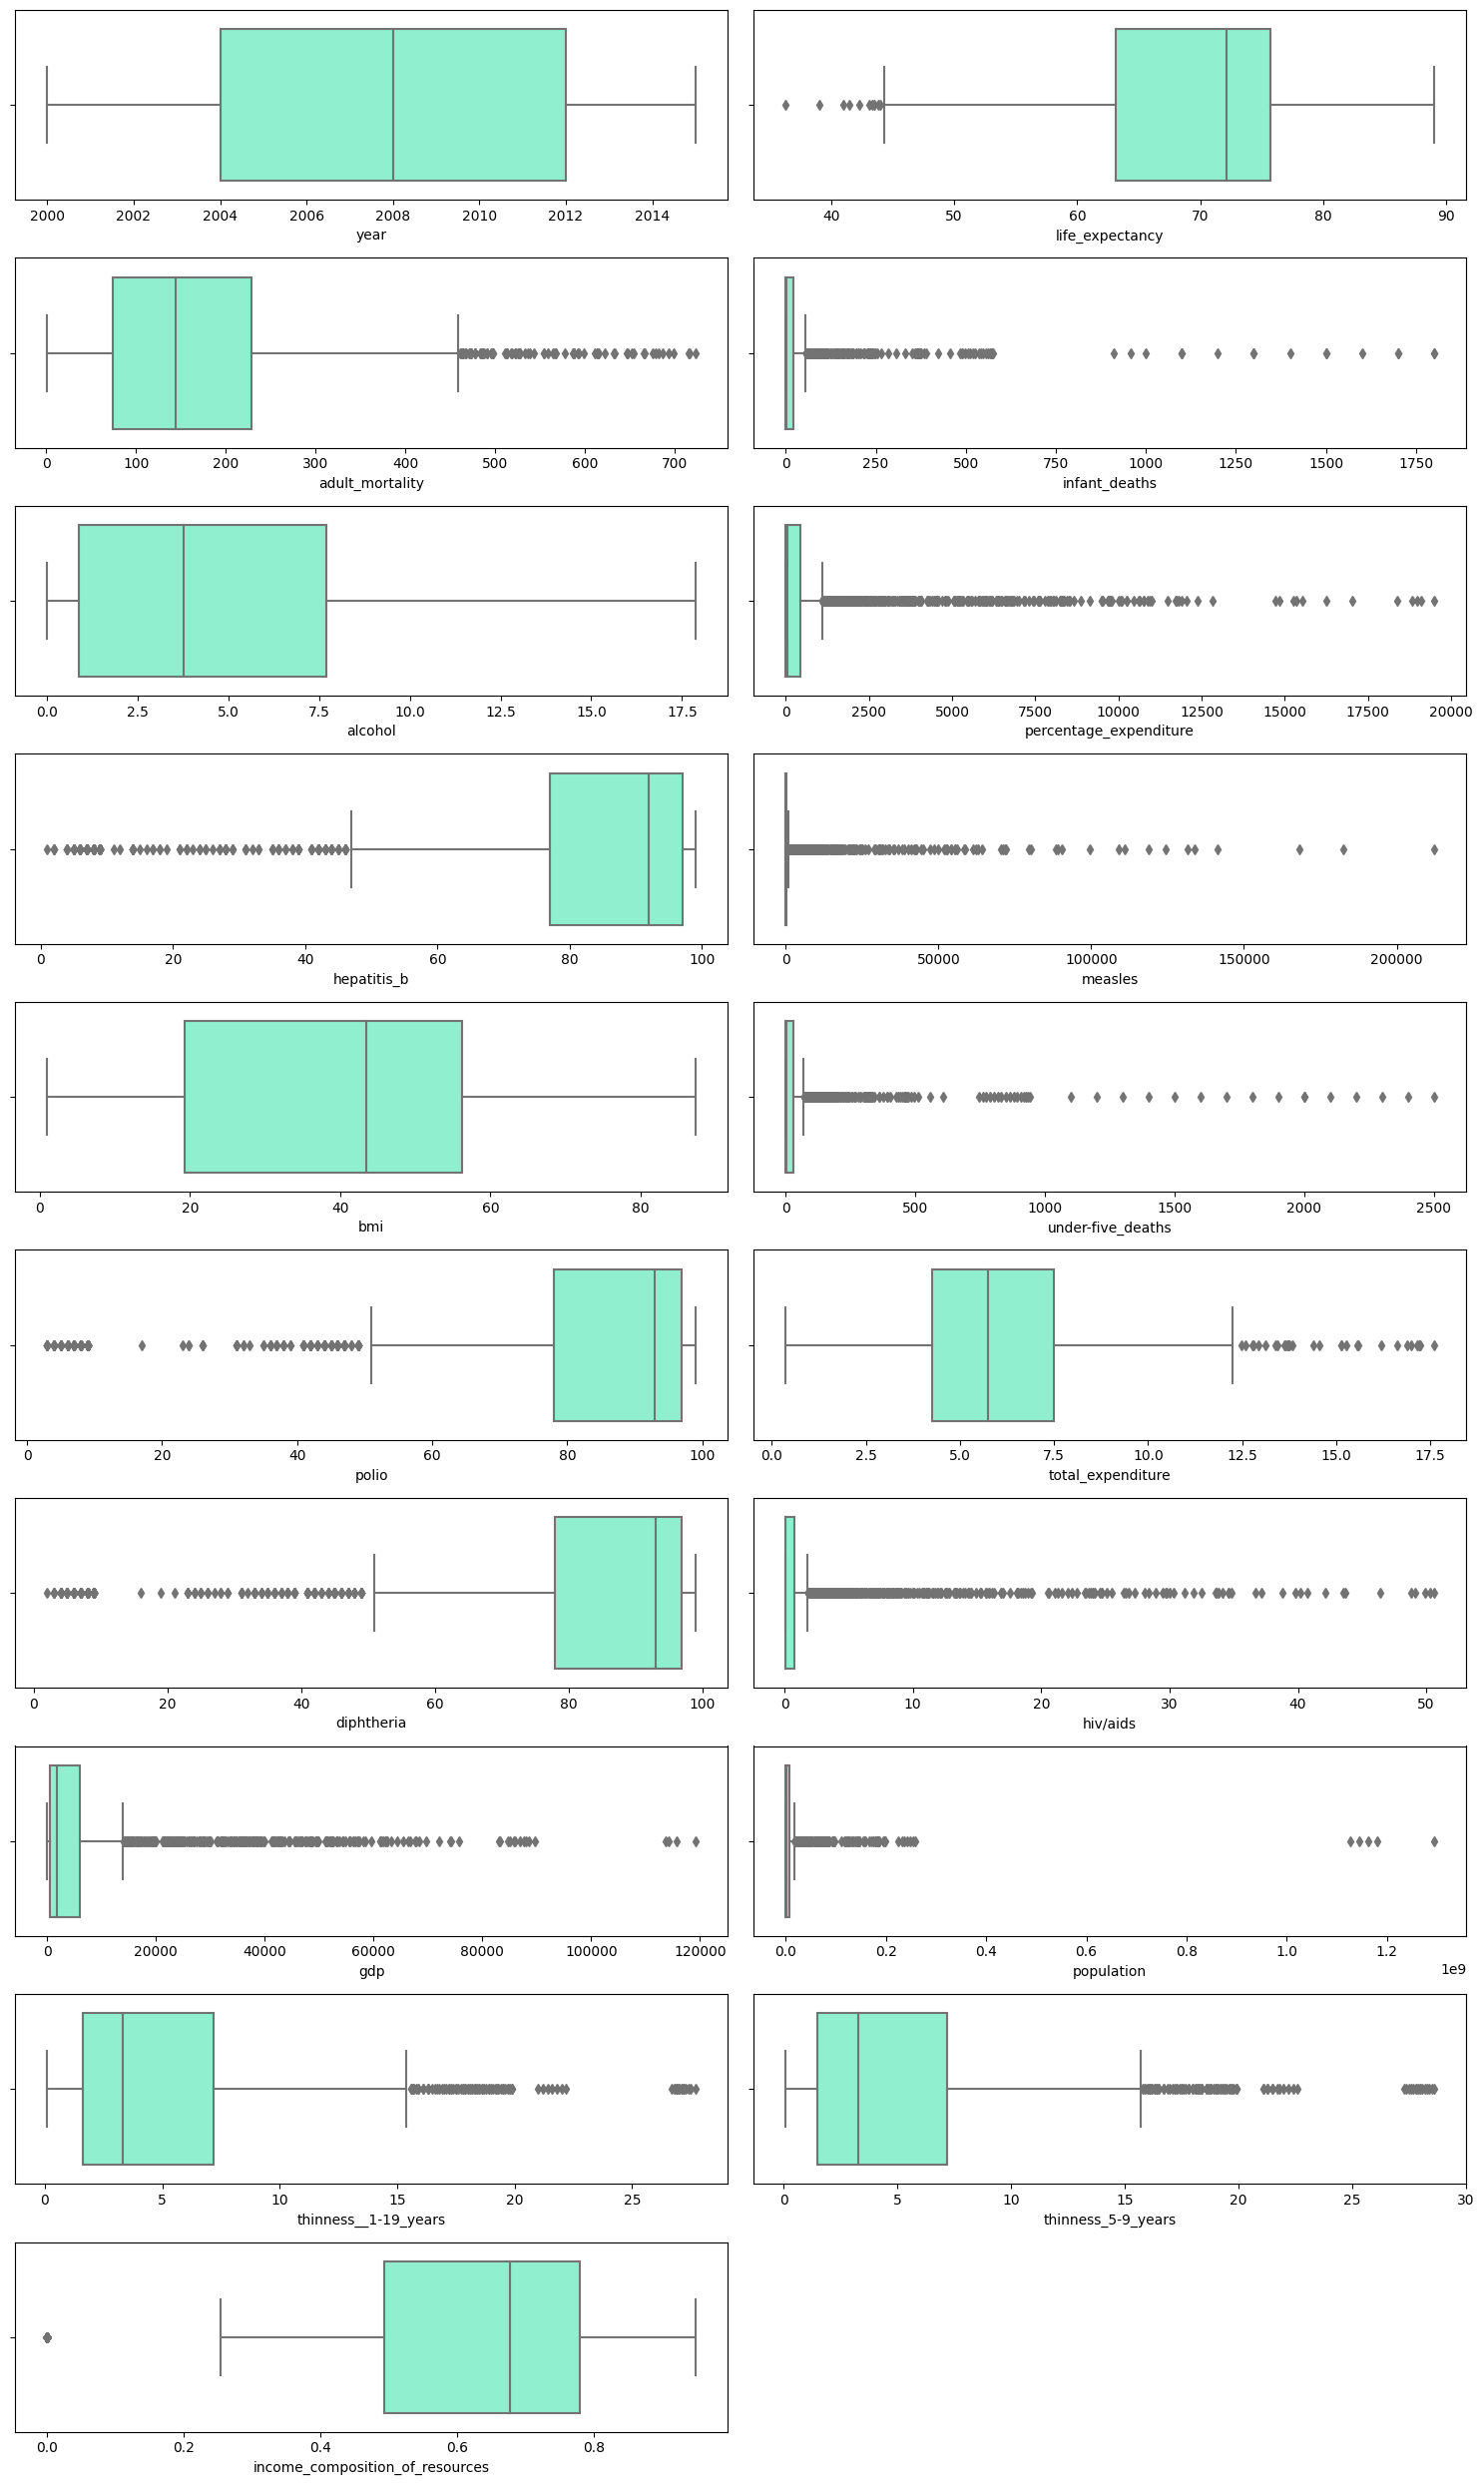

In [455]:
fig, axes = plt.subplots(10, 2, figsize=(15,25))
axes = axes.flat
for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df_endesarrollo, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

Seguimos teniendo en diferentes columnas muchos outliers por lo que decidiremos analizar un poco mas las relaciones entre columnas para ver como continuamos.

---

In [456]:
df_desarrollados.to_csv("../files/desarrollados.csv")

In [457]:
df_endesarrollo.to_csv("../files/endesarrollo.csv")

In [458]:
df.to_csv("../files/life_data_limp.csv")